In [43]:
import numpy as np
from IPython import get_ipython
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rcParams['figure.dpi'] = 300


In [44]:
df = pd.DataFrame({
    'x': [810.45, 1350.75, 1891.05, 1215.675, 1958.5875, 2228.7375, 1620.9, 3039.1875, 3039.1875, 3511.95, 3444.4125, 3511.95, 3714.5625, 3579.4875, 3714.5625, 4119.7875, 4322.4, 4660.0875, 4862.7],
    'y': [1209.4875, 1116.45, 930.375, 1612.65, 1674.675, 1426.575, 1705.6875, 1829.7375, 1953.7875, 2170.875, 2046.825, 1953.7875, 1798.725, 713.2875, 434.175, 248.1, 589.2375, 217.0875, 744.3]
})


In [45]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3)
kmeans.fit(df)


KMeans(n_clusters=3)

In [46]:
k_range = range(1,10)
sse = []
for k in k_range:
    km = KMeans(n_clusters = k)
    km.fit(df)
    sse.append(km.inertia_)
sse

[34289611.43728618,
 12566882.412053572,
 4020991.41595982,
 2900766.4763671863,
 1911515.2761328123,
 1574331.3328124995,
 1341567.230976562,
 934479.2872265619,
 758019.3678515623]

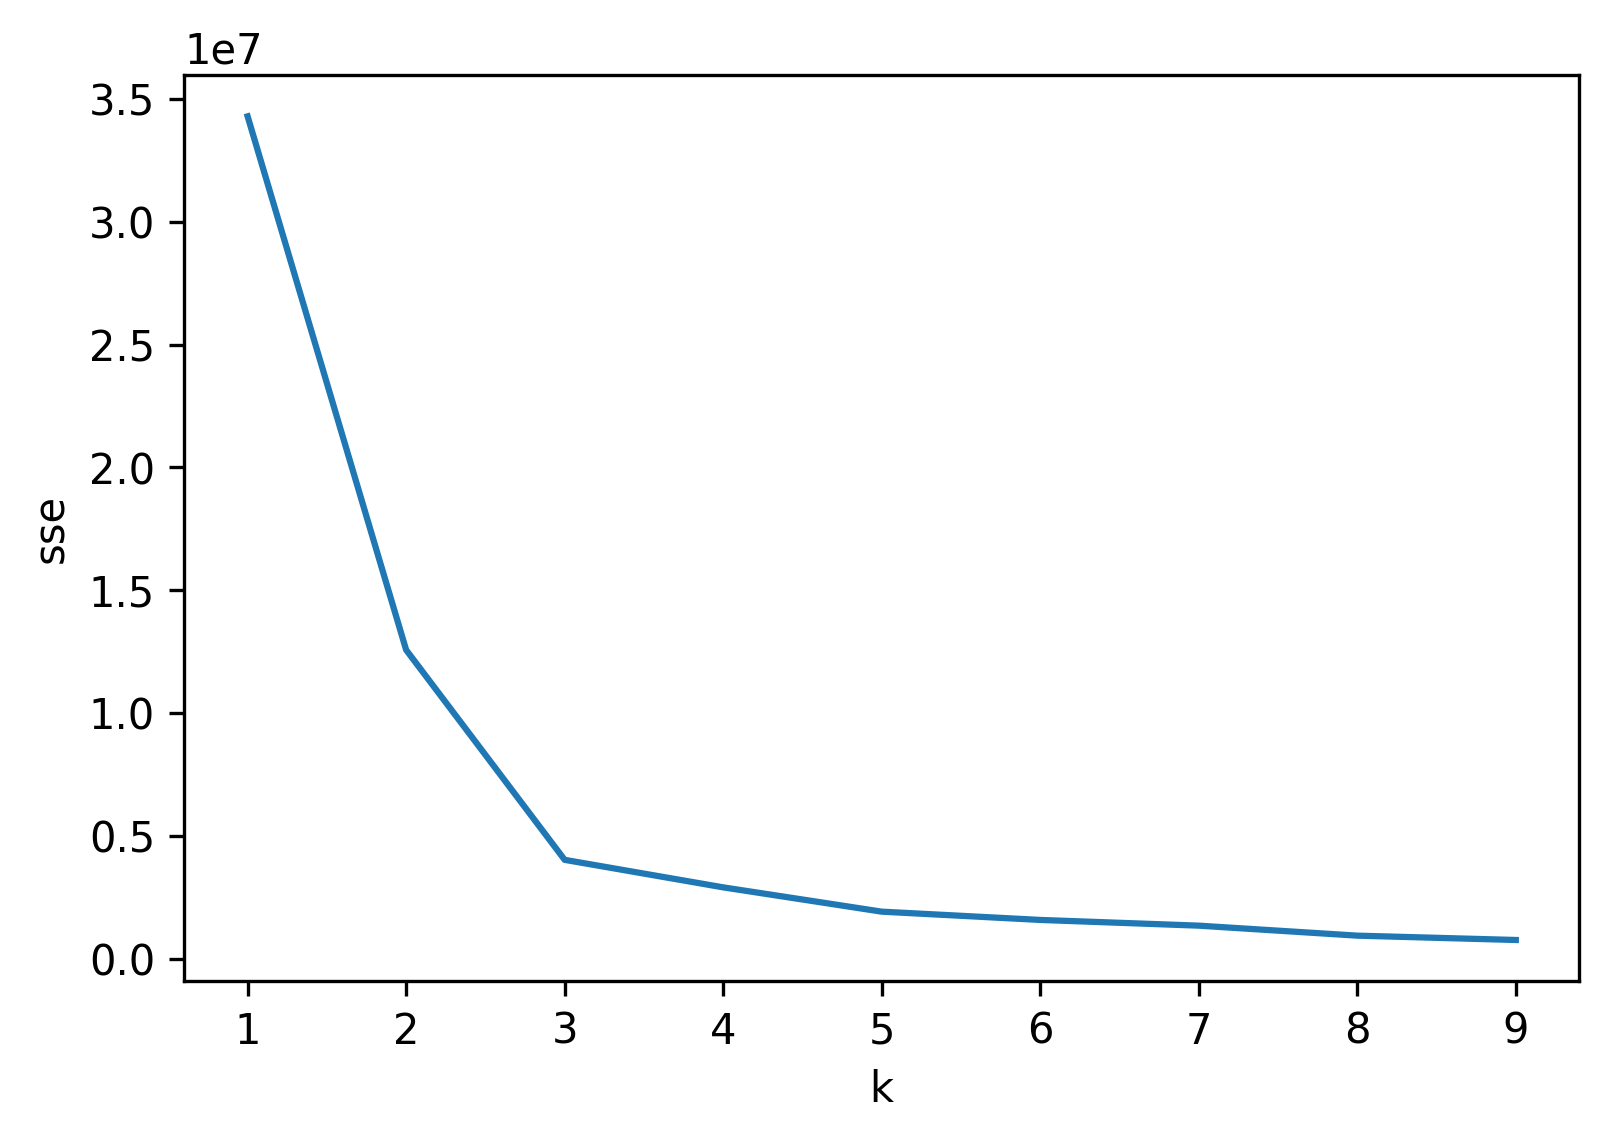

In [47]:
plt.xlabel('k')
plt.ylabel('sse')

plt.plot(k_range, sse)

In [48]:
labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_
centroids

array([[4209.8375    ,  491.03125   ],
       [3376.875     , 1958.95625   ],
       [1582.30714286, 1382.27142857]])

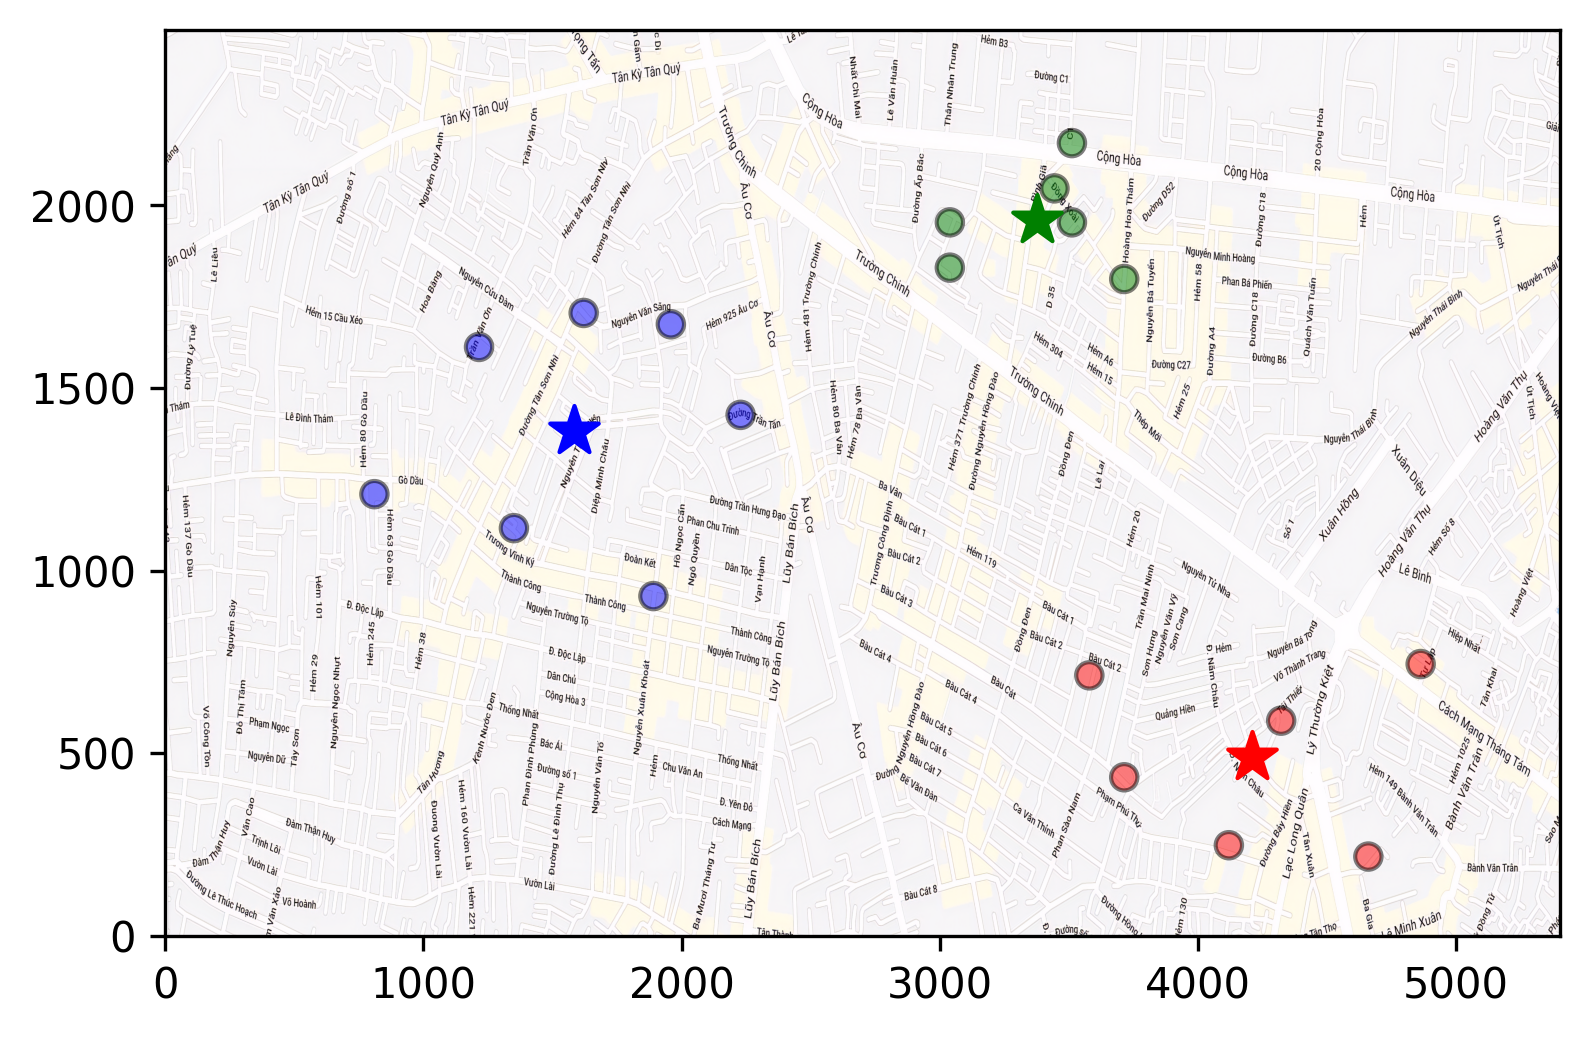

In [49]:
img = plt.imread("map.png")
fig, ax = plt.subplots()
ax.imshow(img, aspect='auto', extent=[0, 5403, 0, 2481])
colmap = {1: 'r', 2: 'g', 3: 'b'}
colors = map(lambda x: colmap[x+1], labels)
colors1 = list(colors)
plt.scatter(df['x'], df['y'], color = colors1, alpha = 0.5, edgecolor = 'k', s=40)
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color = colmap[idx+1], marker = "*", s = 150)

plt.show()
